# Import Libraries

In [36]:
import pandas as pd # DataFrame Manipulation
import numpy as np # Linear Algebra
import random

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

#Model
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD 

#Metrics
from sklearn.metrics import classification_report, confusion_matrix


# File Management
import os
from pathlib import Path

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.config.list_physical_devices('GPU') # Check that TensorFlow is using GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load In Data

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
nClasses = 10

classes = [0,1,2,3,4,5,6,7,8,9]

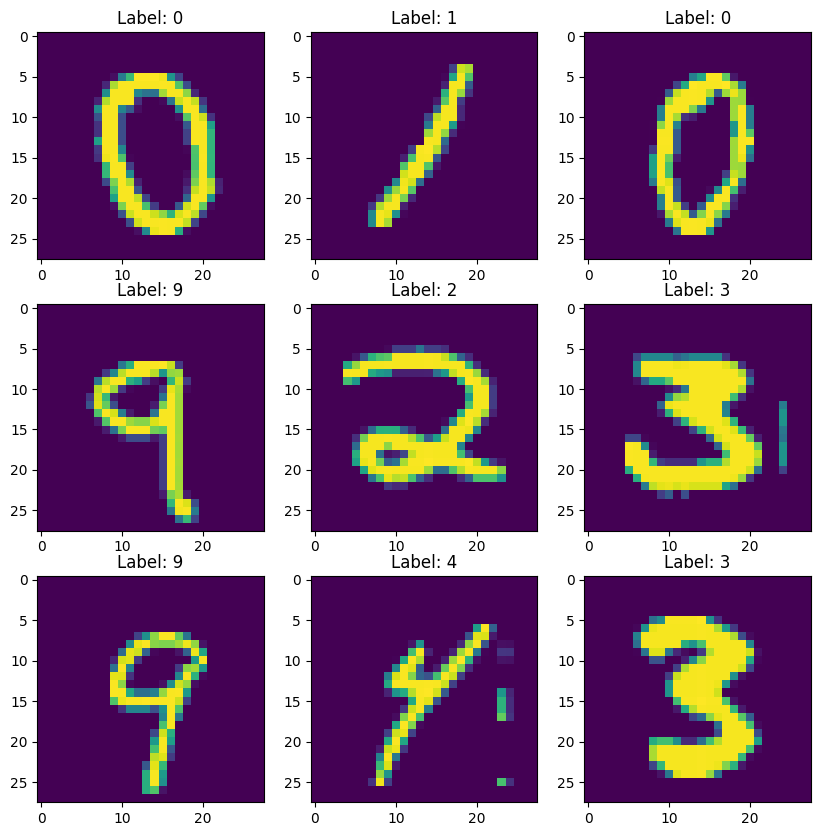

In [6]:
rows, cols = 3,3
fig=plt.figure(figsize=(10,10))
for i in range(cols):
    for j in range(rows):
        rand_ind = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i* rows + j +1)
        ax.imshow(X_train[rand_ind, :])
        ax.set_title(f'Label: {classes[y_train[rand_ind]]}')

# Prepare Data

#### Reshape Data

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

#### Normalization

In [8]:
X_train_norm = X_train.astype('float32')/255.0
X_test_norm = X_test.astype('float32')/255.0

#### One-Hot Encoding

In [9]:
y_train_encode = tf.keras.utils.to_categorical(y_train)
y_test_encode = tf.keras.utils.to_categorical(y_test)

In [10]:
y_train_encode.shape

(60000, 10)

In [11]:
import random
np.random.seed(1) #for numpy
random.seed(1) 
tf.random.set_seed(1) #for tensorflow

In [18]:
model = Sequential()

#Input Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Convolution + Pooling
# 3 Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Flatten())


#ANN (Batch Normalization + Dropout)
# 3 Layers
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = Adam()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    X_train_norm, 
    y_train_encode,
    epochs=20,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3564 - accuracy: 0.8900 - val_loss: 0.0686 - val_accuracy: 0.9811
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1053 - accuracy: 0.9745 - val_loss: 0.0557 - val_accuracy: 0.9860
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0786 - accuracy: 0.9818 - val_loss: 0.0487 - val_accuracy: 0.9880
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0620 - accuracy: 0.9858 - val_loss: 0.0446 - val_accuracy: 0.9894
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0509 - accuracy: 0.9883 - val_loss: 0.0371 - val_accuracy: 0.9908
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0448 - accuracy: 0.9890 - val_loss: 0.0626 - val_accuracy: 0.9877
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0387 - accuracy: 0.9904 - val_loss: 0.0408 - val_accuracy

In [21]:
accuracy = model.evaluate(X_test_norm, y_test_encode, verbose=2)

313/313 - 1s - loss: 0.0433 - accuracy: 0.9907 - 738ms/epoch - 2ms/step


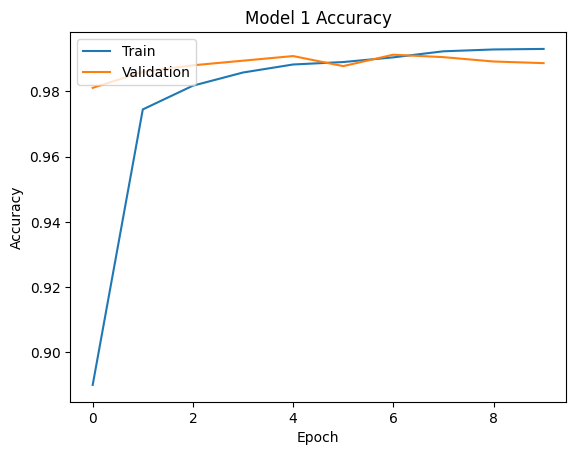

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [63]:
highest_acc = max(history.history['val_accuracy'])
highest_epoch = 0

for i,v in enumerate(history.history['val_accuracy']):
    print(f"Epoch: {i+1}")
    print(f"Accuracy Score: {v}")
    if v==highest_acc:
        highest_epoch=i+1

Epoch: 1
Accuracy Score: 0.981083333492279
Epoch: 2
Accuracy Score: 0.9860000014305115
Epoch: 3
Accuracy Score: 0.9879999756813049
Epoch: 4
Accuracy Score: 0.9894166588783264
Epoch: 5
Accuracy Score: 0.9908333420753479
Epoch: 6
Accuracy Score: 0.9877499938011169
Epoch: 7
Accuracy Score: 0.9912499785423279
Epoch: 8
Accuracy Score: 0.9904999732971191
Epoch: 9
Accuracy Score: 0.9891666769981384
Epoch: 10
Accuracy Score: 0.9886666536331177


In [64]:
print(f"Highest Accuracy: {highest_acc}\nEpoch: {highest_epoch}")

Highest Accuracy: 0.9912499785423279
Epoch: 7


In [65]:
model.fit(
    X_train_norm, 
    y_train_encode,
    epochs=7,
    validation_split=0.2
)

Epoch 1/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0264 - accuracy: 0.9935 - val_loss: 0.0584 - val_accuracy: 0.9900
Epoch 2/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0242 - accuracy: 0.9945 - val_loss: 0.0567 - val_accuracy: 0.9908
Epoch 3/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 0.0563 - val_accuracy: 0.9893
Epoch 4/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0209 - accuracy: 0.9951 - val_loss: 0.0422 - val_accuracy: 0.9923
Epoch 5/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0204 - accuracy: 0.9951 - val_loss: 0.0695 - val_accuracy: 0.9877
Epoch 6/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0177 - accuracy: 0.9958 - val_loss: 0.0570 - val_accuracy: 0.9912
Epoch 7/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0708 - val_accuracy: 0.9900

# Predictions

In [72]:
y_pred_test = model.predict(X_test_norm)

y_pred_test_classes = np.argmax(y_pred_test, axis=1)

y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 1s 2ms/step


### Visualize Predictions

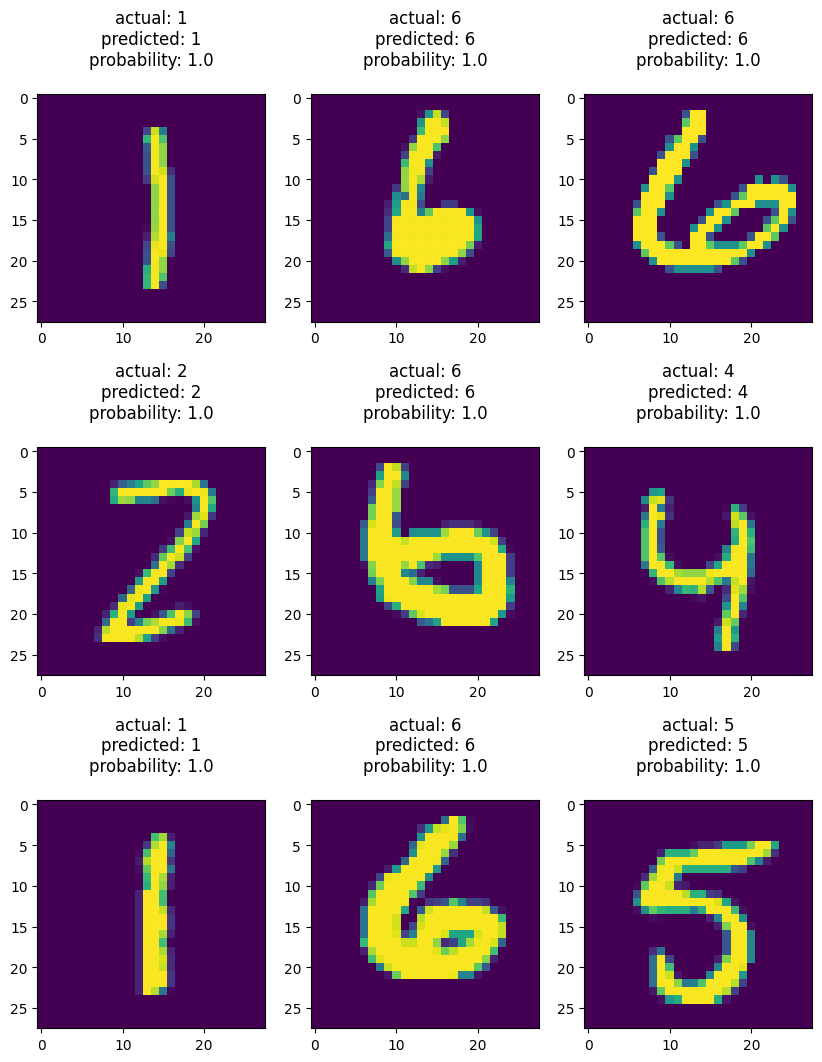

In [74]:
rows, cols = 3,3
fig=plt.figure(figsize=(10,13))
for i in range(cols):
    for j in range(rows):
        rand_ind = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i* rows + j +1)
        ax.imshow(X_test[rand_ind, :])

        pred_label = classes[y_pred_test_classes[rand_ind]]
        pred_proba = y_pred_test_max_probas[rand_ind]
        true_label = classes[y_test[rand_ind]]

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))

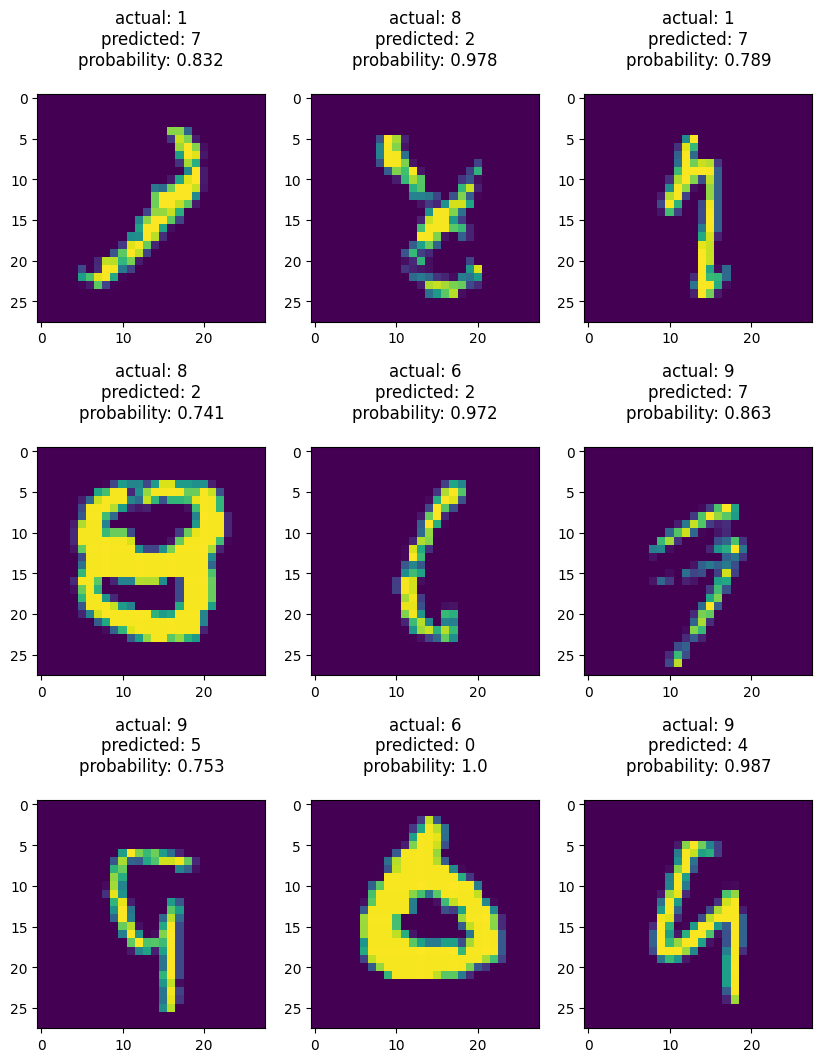

In [75]:
rows, cols = 3,3
fig=plt.figure(figsize=(10,13))
for i in range(cols):
    for j in range(rows):
        shown = False
        while not shown:
            rand_ind = np.random.randint(0, len(y_test))
            

            pred_label = classes[y_pred_test_classes[rand_ind]]
            pred_proba = y_pred_test_max_probas[rand_ind]
            true_label = classes[y_test[rand_ind]]

            if pred_label!=true_label:
                ax = fig.add_subplot(rows, cols, i* rows + j +1)
                ax.imshow(X_test[rand_ind, :])
                ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
                    true_label, pred_label, pred_proba
                    ))
                shown=True

### Analyze Results

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(0.5, 25.722222222222214, 'Predicted Values')

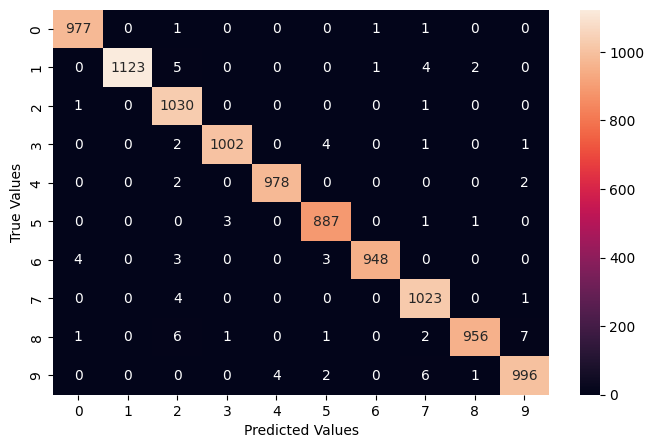

In [76]:
print(classification_report(y_test, y_pred_test_classes))

confusion_mat = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_mat, annot=True, fmt='.0f', xticklabels=classes, yticklabels=classes)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')